In [1]:
from data_reader import DataReader
from battle_related_deaths import BRDModule
from first_supporter_year import FirstSupportYear
import pandas as pd
from get_longevity import LongevityModule
from before_after_brd_support import SupportersAfterBeforeBRD

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_obj = DataReader()
brd_obj = BRDModule()
first_support_year_obj = FirstSupportYear()
longevity_obj = LongevityModule()
before_after_brd = SupportersAfterBeforeBRD()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (5,14,34,35,80) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (5,14,34,35,80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DtypeWarning: Columns (5,14,34,35,80) have mixed types.Specify dtype option on import or set low_memory=False.
  """


In [4]:
df = data_obj.get_pandas_df()

In [5]:
brd1_year_map, brd2_year_map = {}, {}
years_to_brd1_map, years_to_brd2_map = {}, {}
for nag_id in df['nagcode_1'].unique().tolist():
    _, _, respone= brd_obj.get_years_from_brd1and2(nag_id)
    brd1_year, brd2_year = respone['brd1_year'], respone['brd2_year']
    years_to_brd1, years_to_brd2 = respone['years_to_brd1'], respone['years_to_brd2']

    brd1_year_map[nag_id] = brd1_year
    brd2_year_map[nag_id] = brd2_year
    years_to_brd1_map[nag_id] = years_to_brd1
    years_to_brd2_map[nag_id] = years_to_brd2

In [6]:
df[df['nagcode_1']==11][['year', 'supporter', 'startdate1', 'startdate2']]

,year,supporter,startdate1,startdate2
244,1986.0,NaN,1/27/87,8/29/87
245,1987.0,NaN,1/27/87,8/29/87
246,1988.0,NaN,1/27/87,8/29/87
247,1989.0,NaN,1/27/87,8/29/87
248,1990.0,NaN,1/27/87,8/29/87


In [7]:
first_support_year_map = {}
for nag_id in df['nagcode_1'].unique().tolist():
    first_support_year, _= first_support_year_obj.get_first_support_year(nag_id)
    first_support_year_map[nag_id] = first_support_year

In [8]:
longevity_map = {}
start_year_map = {}
for nag_id in df['nagcode_1'].unique().tolist():
    lifespan, min_year, _ = longevity_obj.calculate_longevity(nag_id)
    longevity_map[nag_id] = lifespan
    start_year_map[nag_id] = min_year

In [9]:
df['brd1_year'] = df['nagcode_1'].apply(lambda x:brd1_year_map[x])
df['brd2_year'] = df['nagcode_1'].apply(lambda x:brd2_year_map[x])
df['first_support_year'] = df['nagcode_1'].apply(lambda x:first_support_year_map[x])
df['years_to_brd1'] = df['nagcode_1'].apply(lambda x:years_to_brd1_map[x])
df['years_to_brd2'] = df['nagcode_1'].apply(lambda x:years_to_brd2_map[x])

In [10]:
df['lifespan'] = df['nagcode_1'].apply(lambda x:longevity_map[x])

In [11]:
df['years_to_first_support'] = df['nagcode_1'].apply(lambda x:(first_support_year_map[x]-start_year_map[x]) if first_support_year_map[x] else np.nan)

In [12]:
df[['year', 'nagcode_1', 'supporter', 'startdate1', 'startdate2', 'years_to_brd1', 'years_to_brd2', 'first_support_year', 'years_to_first_support']]

,year,nagcode_1,supporter,startdate1,startdate2,years_to_brd1,years_to_brd2,first_support_year,years_to_first_support
0,1945.0,1.0,Thailand,8/31/46,8/31/46,1.0,1.0,1945.0,0.0
1,1946.0,1.0,Thailand,8/31/46,8/31/46,1.0,1.0,1945.0,0.0
2,1947.0,1.0,Thailand,8/31/46,8/31/46,1.0,1.0,1945.0,0.0
3,1948.0,1.0,Thailand,8/31/46,8/31/46,1.0,1.0,1945.0,0.0
4,1949.0,1.0,Thailand,8/31/46,8/31/46,1.0,1.0,1945.0,0.0
...,...,...,...,...,...,...,...,...,...
16664,1979.0,422.0,Costa Rica,12/28/74,10/11/77,13.0,16.0,1961.0,0.0
16665,1979.0,422.0,Costa Rica,12/28/74,10/11/77,13.0,16.0,1961.0,0.0
16666,1979.0,422.0,Costa Rica,12/28/74,10/11/77,13.0,16.0,1961.0,0.0
16667,1979.0,422.0,Costa Rica,12/28/74,10/11/77,13.0,16.0,1961.0,0.0


In [39]:
before_len, after_len = [], []
for nag_id in df['nagcode_1'].unique().tolist():
    _, brd2_info = before_after_brd.get_supporters(nag_id)
    supporters_before_brd2, supporters_after_brd2 = brd2_info
    before_len.append(len(supporters_before_brd2))
    after_len.append(len(supporters_after_brd2))

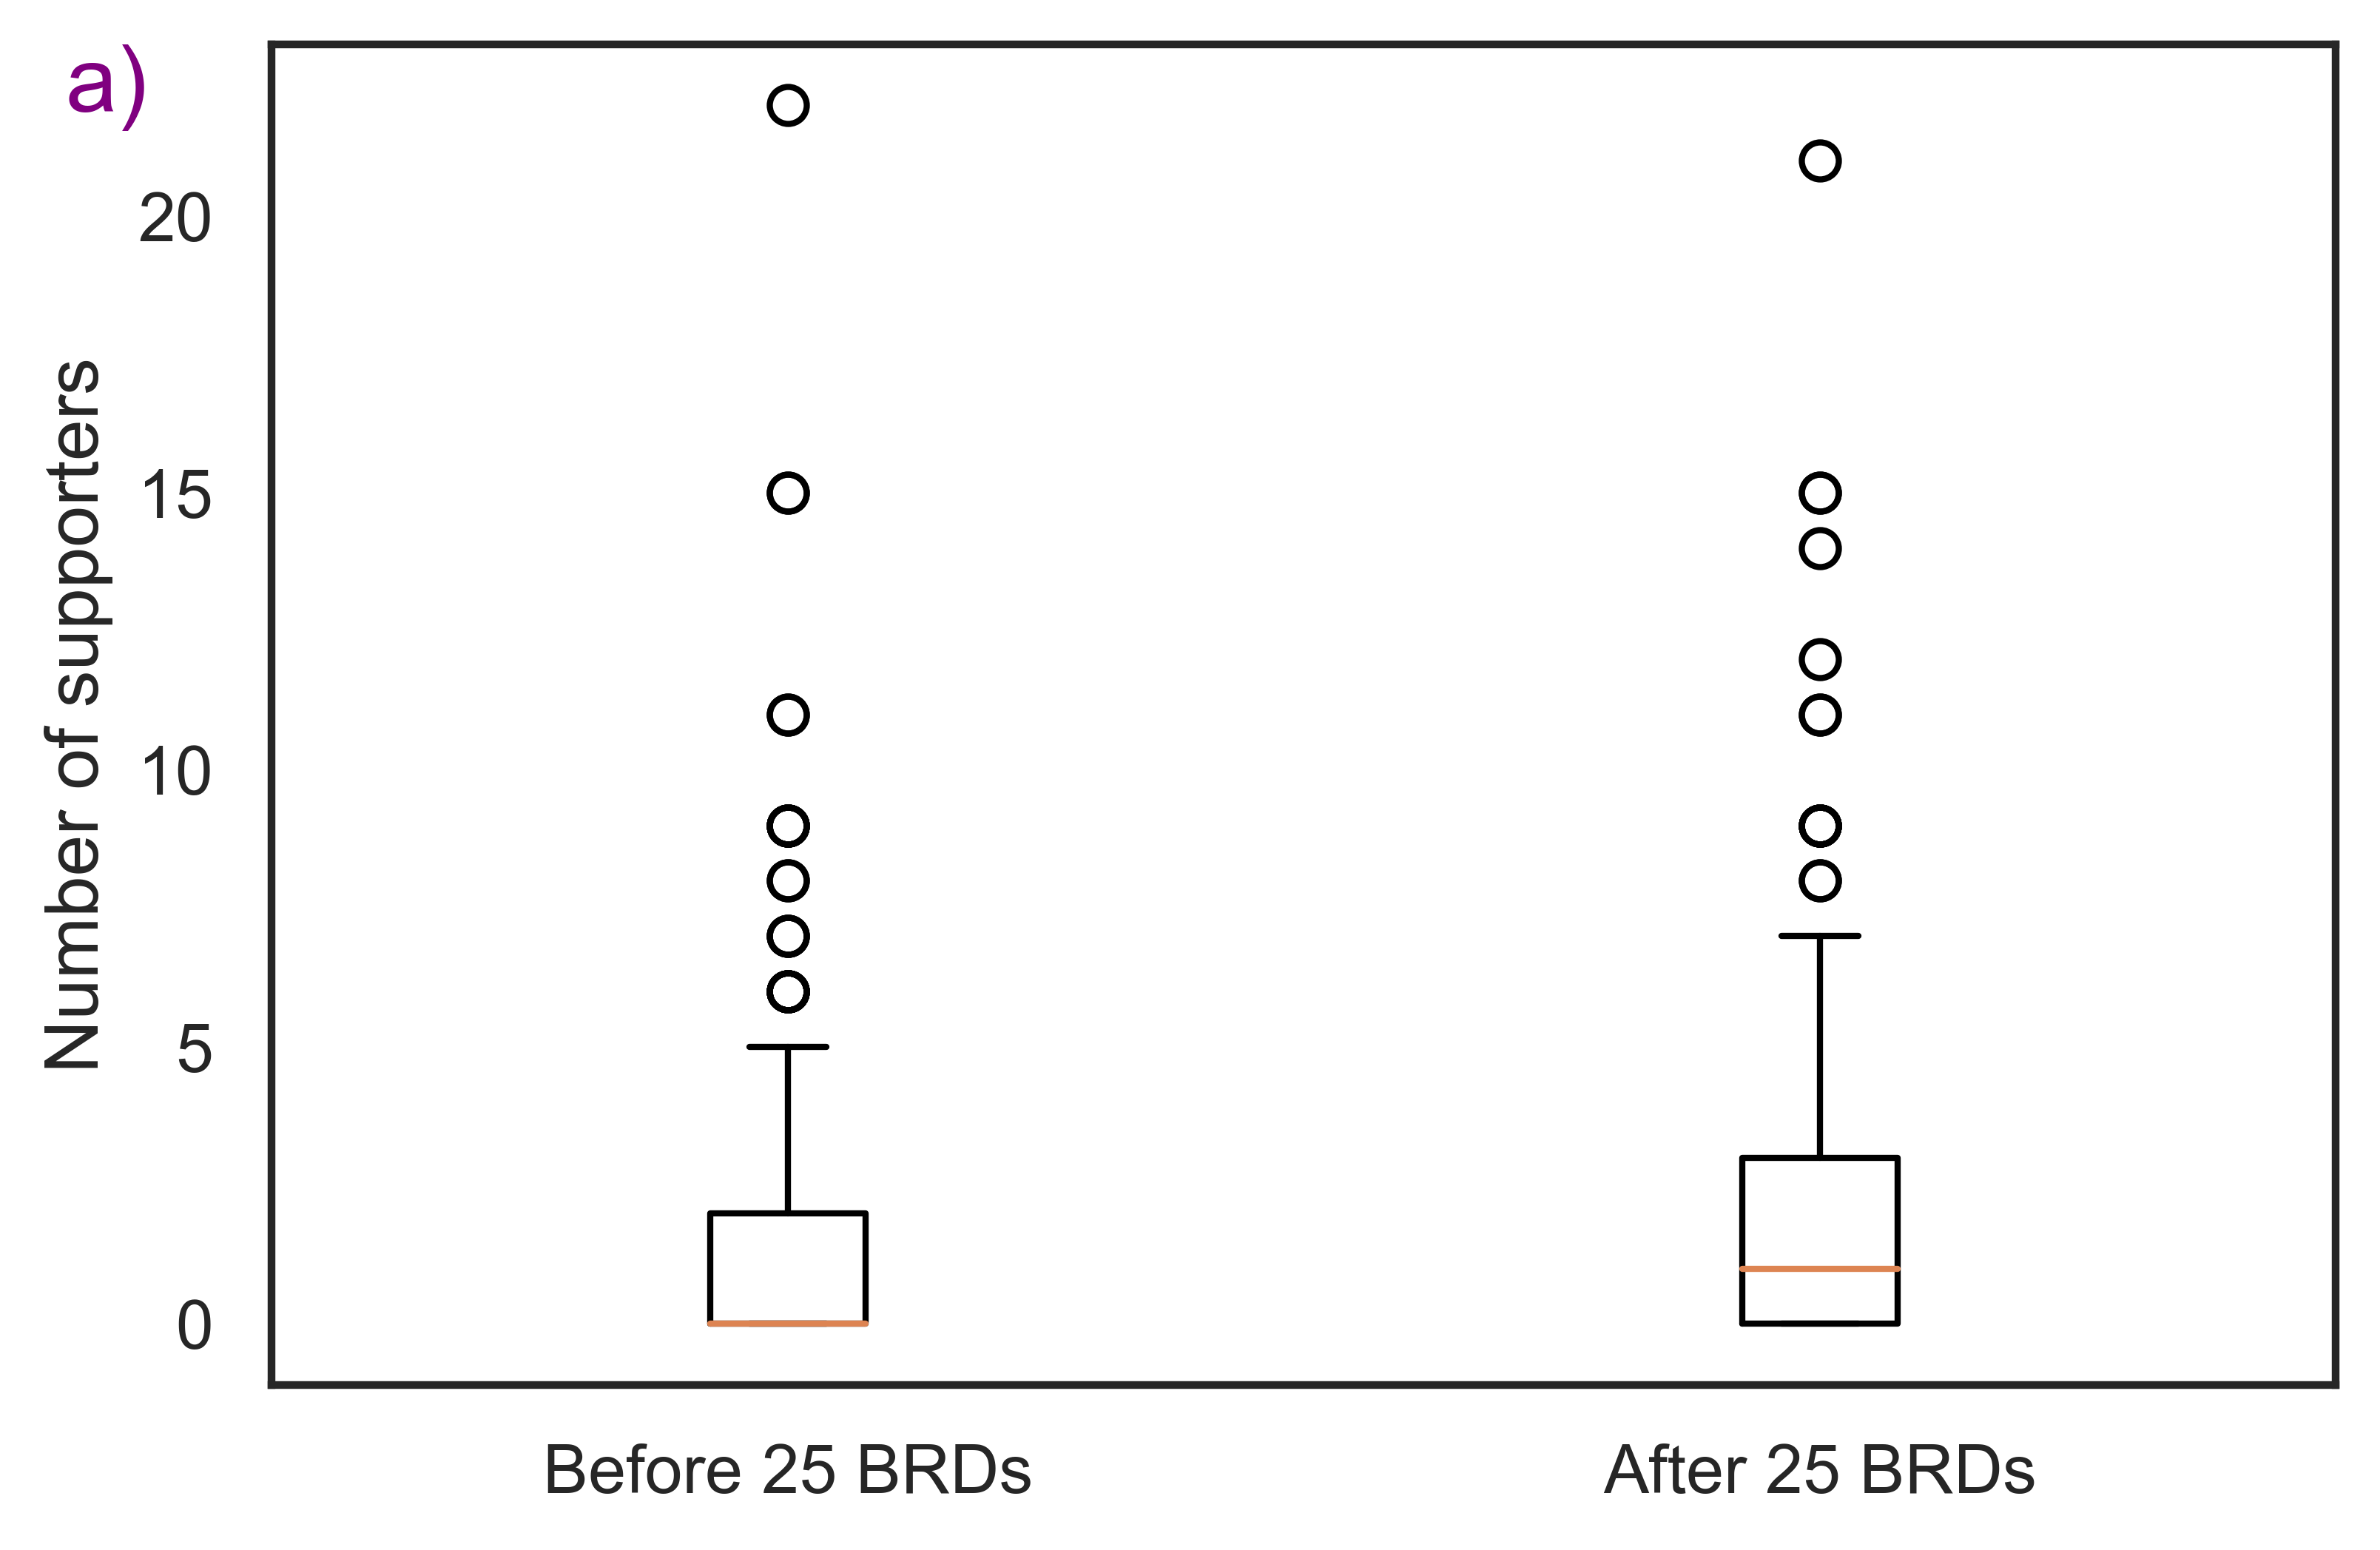

In [60]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(dpi=600)
plt.boxplot([before_len, after_len])
plt.xticks([1, 2], ['Before 25 BRDs', 'After 25 BRDs'])
plt.ylabel("Number of supporters")
ax.text(-0.1, 0.95, 'a)', transform=ax.transAxes, size=15,color='purple')
plt.savefig('supplementary_image/after_before_brd.png', bbox_inches='tight')
plt.show()

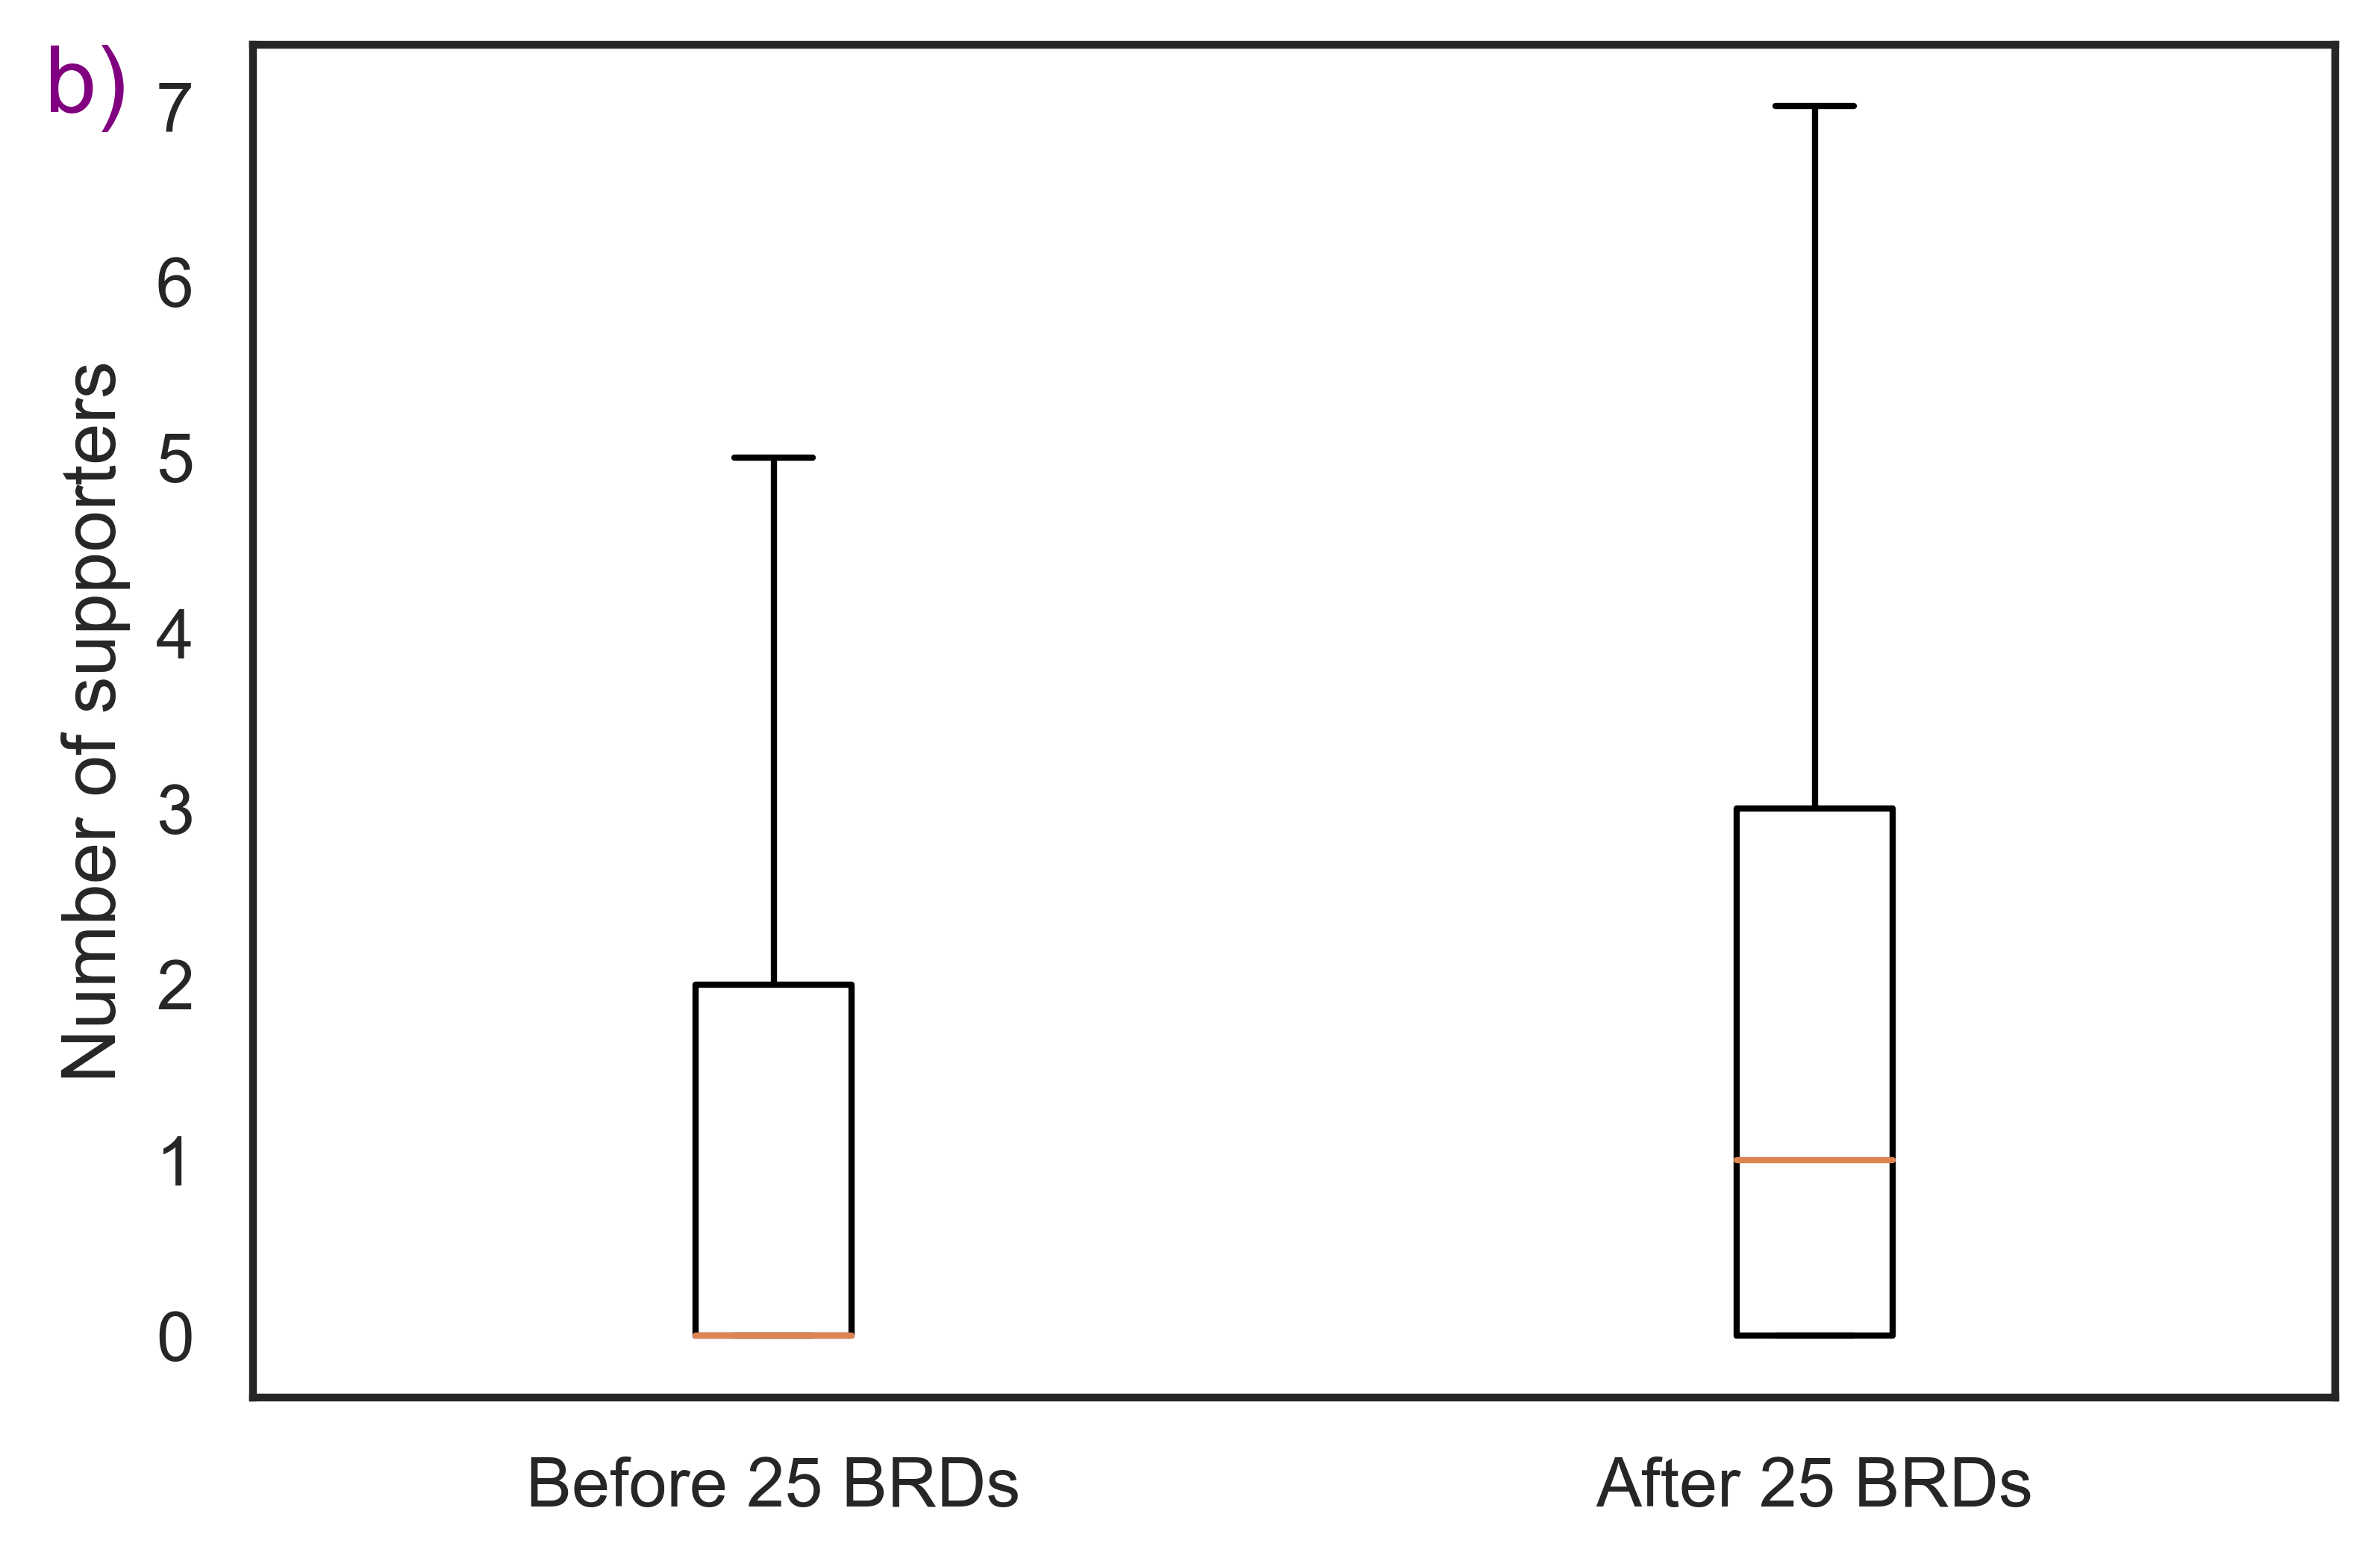

In [62]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(dpi=600)
plt.boxplot([before_len, after_len], sym='')
plt.xticks([1, 2], ['Before 25 BRDs', 'After 25 BRDs'])
ax.text(-0.1, 0.95, 'b)', transform=ax.transAxes, size=15,color='purple')
plt.ylabel("Number of supporters")
plt.savefig('supplementary_image/after_before_brd_b.png', bbox_inches='tight')
plt.show()

In [67]:
print (np.percentile(before_len, 50), np.percentile(before_len, 75), np.percentile(before_len, 90))
print (np.percentile(after_len, 50),np.percentile(after_len, 75),np.percentile(after_len, 90))

0.0 2.0 4.0
1.0 3.0 4.0


In [14]:
df.drop_duplicates('nagcode_1', keep='first')[(df['years_to_first_support'] > df['years_to_brd2'])]

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,triadid,UCDPdyadid,conflictid,year,yr_active,foundyr,startdate1,startdate2,target,tarnum_cow,...,ds_precision_oth,domsup,domsup_p,brd1_year,brd2_year,first_support_year,years_to_brd1,years_to_brd2,lifespan,years_to_first_support


In [15]:
def brd1_after_first_supportor(x):
    if pd.isna(x['first_support_year']):
        return 0
    elif x['brd1_year'] > x['first_support_year']:
        return 1
    else:
        return 0

df['brd1_after_first_supportor'] = df.apply(brd1_after_first_supportor, axis=1)

In [16]:
def brd2_after_first_supportor(x):
    if pd.isna(x['first_support_year']):
        return 0
    elif x['brd2_year'] > x['first_support_year']:
        return 1
    else:
        return 0

df['brd2_after_first_supportor'] = df.apply(brd2_after_first_supportor, axis=1)

In [17]:
df[df['nagcode_1']==12][['year', 'supporter', 'brd1_year', 'brd2_year', 'first_support_year', 
                         'brd1_after_first_supportor', 'brd2_after_first_supportor', 'lifespan']]

,year,supporter,brd1_year,brd2_year,first_support_year,brd1_after_first_supportor,brd2_after_first_supportor,lifespan
249,1945.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
250,1946.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
251,1947.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
252,1948.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
253,1949.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
254,1950.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
255,1951.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
256,1952.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
257,1953.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
258,1954.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0


In [18]:
df_brd1_after_support = df[df['brd1_after_first_supportor'] == 1].drop_duplicates('nagcode_1', keep='first')
df_brd1_before_support = df[df['brd1_after_first_supportor'] == 0].drop_duplicates('nagcode_1', keep='first')

In [19]:
df_brd2_after_support = df[df['brd2_after_first_supportor'] == 1].drop_duplicates('nagcode_1', keep='first')
df_brd2_before_support = df[df['brd2_after_first_supportor'] == 0].drop_duplicates('nagcode_1', keep='first')

In [20]:
df_brd1_after_support.shape, df_brd1_before_support.shape

((173, 92), (286, 92))

In [21]:
df_brd2_after_support.shape, df_brd2_before_support.shape

((201, 92), (258, 92))

In [22]:
np.corrcoef(df_brd1_after_support['years_to_brd1'], df_brd1_after_support['lifespan'])

array([[1.        , 0.47681691],
       [0.47681691, 1.        ]])

In [23]:
temp = df_brd1_before_support['years_to_brd1'].fillna(df_brd1_before_support['years_to_brd1'].median())
np.corrcoef(temp, df_brd1_before_support['lifespan'])

array([[1.        , 0.40120365],
       [0.40120365, 1.        ]])

In [24]:
np.corrcoef(df_brd2_after_support['years_to_brd1'], df_brd2_after_support['lifespan'])

array([[1.        , 0.48976543],
       [0.48976543, 1.        ]])

In [25]:
temp = df_brd2_before_support['years_to_brd1'].fillna(df_brd2_before_support['years_to_brd1'].median())
np.corrcoef(temp, df_brd2_before_support['lifespan'])

array([[1.        , 0.45242574],
       [0.45242574, 1.        ]])

In [26]:
df2 = df.drop_duplicates('nagcode_1', keep='first')

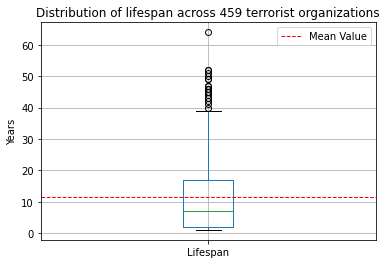

In [27]:
plt.close()
df2.boxplot(column='lifespan')
plt.axhline(y=np.mean(df2['lifespan']), linestyle='--', linewidth=1, color='r', label='Mean Value')
plt.ylabel("Years")
plt.xticks([1], ['Lifespan'])
plt.title('Distribution of lifespan across 459 terrorist organizations')
plt.legend(loc='upper right')
plt.savefig("supplementary_box_plot.png", dpi=800)
plt.show()

In [28]:
np.mean(df2['lifespan'])

11.525054466230937

In [29]:
np.percentile(df2['lifespan'], 50)

7.0

In [30]:
np.percentile(df2['lifespan'], 10)

1.0

In [31]:
np.percentile(df2['lifespan'], 90)

31.0

In [32]:
np.percentile(df2['lifespan'], 25)

2.0

In [33]:
np.percentile(df2['lifespan'], 75)

17.0